<a href="https://colab.research.google.com/github/mwithgod3952/Machine_Learning_Theory_jh/blob/master/kalmanfilter_original_for_smoothing_data_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import time
import os

import pandas as pd
import numpy as np

from urllib.parse import urlsplit, parse_qs

from collections import namedtuple

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
url = 'https://raw.githubusercontent.com/herzog-ch/stock-prediction-using-kalman-in-python/master/data/IFNNY.csv'
stock_df = pd.read_csv(url)
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

In [5]:
stock_df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
1258,2019-09-27,18.17,18.190001,17.719999,17.83,17.83,203700


In [6]:
print("- 컬럼의 구성: ", stock_df.columns.tolist())
print("- 행의 수: ", stock_df.shape[0], "열의 수: ", stock_df.shape[1])

- 컬럼의 구성:  ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
- 행의 수:  1259 열의 수:  7


In [7]:
State = namedtuple('State', 'X, P')

def predict(state, F, Q):
    assert state.X.shape[0] == F.shape[1]
    assert state.X.shape[1] == 1
    assert F.shape[0] == F.shape[1]
    assert Q.shape[0] == Q.shape[1]
    assert Q.shape[0] == F.shape[0]

    x_pred = np.matmul(F, state.X)
    p_pred = np.matmul(F, np.matmul(state.P, F.T)) + Q
    return State(x_pred, p_pred)


def update(prior, z, R, H):
    assert prior.X.shape[1] == 1
    assert prior.X.shape[0] == H.shape[1]
    assert H.shape[0] == z.shape[0]
    assert z.shape[1] == 1
    assert prior.P.shape[0] == prior.P.shape[1]
    assert prior.P.shape[1] == H.shape[1]

    z_pred = np.matmul(H, prior.X)
    y = z - z_pred
    S = np.matmul(H, np.matmul(prior.P, H.T)) + R
    K = np.matmul(prior.P, np.matmul(H.T, np.linalg.inv(S)))
    x_posterior = prior.X + np.matmul(K, y)
    p_posterior = np.matmul((np.identity(prior.P.shape[0]) - np.matmul(K, H)), prior.P)
    return State(x_posterior, p_posterior)

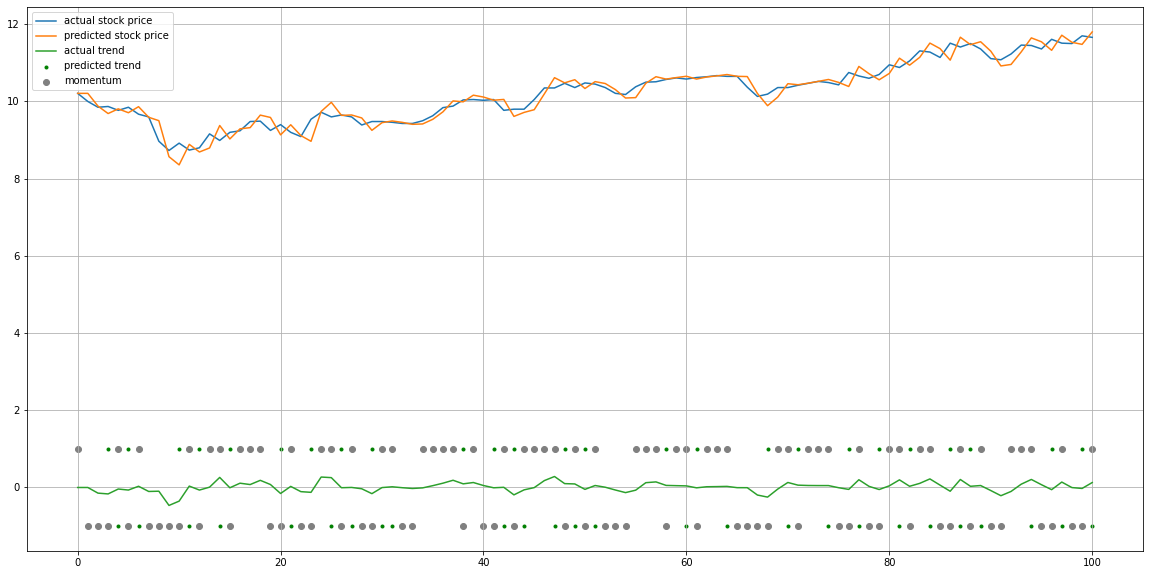

In [28]:
data = []
for row in range(len(stock_df)):
    itr = stock_df.loc[row, ['Open', 'High', 'Low',	'Close', 'Adj Close', 'Volume']]
    data.append(np.array([[float(dict(itr)['Low'])]]))

# init kalman filter
x = np.full((2, 1), 2)
P = np.full((2, 2), 2 ** 2)
state = State(x, P)

Q = np.full((2, 2), 1 ** 2)
F = np.array([[1, 1],
                [0, 1]])
R = np.array([[0.5 ** 2]])
H = np.array([[1, 0]])

# data for plotting
gt = {'price': [], 'trend': []}
result = {'price': [], 'trend': []}
velocity = []

ind = 0
while True:
    z = data[ind + 1]
    if ind == 0:
        x = np.array([[z[0][0]], [0]])
        state = State(x, P)

    prior = predict(state, F, Q)
    posterior = update(prior, z, R, H)
    state = posterior

    gt['price'].append(z[0][0])
    result['price'].append(prior.X[0][0])
    velocity.append(prior.X[1][0])

    if ind == 0:
        gt['trend'].append(1)
        result['trend'].append(1)
    else:
        predicted_trend = 1 if prior.X[0][0] > result['price'][ind - 1] else -1
        result['trend'].append(predicted_trend)
        gt_trend = 1 if z[0][0] > gt['price'][ind - 1] else -1
        gt['trend'].append(gt_trend)  
    ind += 1
    if ind > 100:
        break

correct_predictions = 0
for x, y in zip(result['trend'], gt['trend']):
    if x == y:
        correct_predictions += 1
# print(correct_predictions)
# print(len(gt['trend']))
# print(float(correct_predictions) / len(gt['trend']))

plt.figure(1, figsize=(20, 10))

plt.plot(gt['price'])
plt.plot(result['price'])
plt.plot(velocity)

x_axis = list(range(len(gt['trend'])))
plt.scatter(x_axis, gt['trend'], marker='.', color='g')
plt.scatter(x_axis, result['trend'], marker='o', color='gray')

plt.legend(['actual stock price', 'predicted stock price', 'actual trend', 'predicted trend', 'momentum'])

plt.grid()
plt.show()        

In [ ]:
def main():

    data_filename = '../data/IFNNY.csv'
    dataReader = yahoo_financedata.YahooFinanceData()
    dataReader.open_data(data_filename)

    # init kalman filter
    x = np.full((2, 1), 2)
    P = np.full((2, 2), 2 ** 2)
    state = kalman_filter.State(x, P)

    Q = np.full((2, 2), 1 ** 2)
    F = np.array([[1, 1],
                  [0, 1]])
    R = np.array([[0.5 ** 2]])
    H = np.array([[1, 0]])

    # data for plotting
    gt = {'price': [], 'trend': []}
    result = {'price': [], 'trend': []}
    velocity = []

    counter = 0

    # 현재 1차원의 Time series가 어떻게 읽혀들여지고 있는지 확인이 필요.
    while YahooFinanceData.has_more_data():
        z = YahooFinanceData.next_measurement()

        if counter == 0:
            x = np.array([[z[0][0]], [0]])
            state = kalman_filter.State(x, P)

        prior = kalman_filter.predict(state, F, Q)
        posterior = kalman_filter.update(prior, z, R, H)
        state = posterior

        gt['price'].append(z[0][0])
        result['price'].append(prior.X[0][0])
        velocity.append(prior.X[1][0])

        if counter == 0:
            gt['trend'].append(1)
            result['trend'].append(1)
        else:
            predicted_trend = 1 if prior.X[0][0] > result['price'][counter - 1] else -1
            result['trend'].append(predicted_trend)
            gt_trend = 1 if z[0][0] > gt['price'][counter - 1] else -1
            gt['trend'].append(gt_trend)

        counter += 1
        # if counter > 20:
        #    break

    # KPI
    # number of correct trend predictions
    correct_predictions = 0
    for x, y in zip(result['trend'], gt['trend']):
        if x == y:
            correct_predictions += 1
    print(correct_predictions)
    print(len(gt['trend']))
    print(float(correct_predictions) / len(gt['trend']))

    plt.figure(1)

    plt.plot(gt['price'])
    plt.plot(result['price'])
    plt.plot(velocity)

    x_axis = list(range(len(gt['trend'])))
    plt.scatter(x_axis, gt['trend'], marker='o', color='g')
    plt.scatter(x_axis, result['trend'], marker='x', color='r')

    plt.legend(['actual stock price', 'predicted stock price', 'actual trend', 'predicted trend', 'momentum'])

    plt.grid()
    plt.show()


if __name__ == '__main__':
    main()

TypeError: ignored

In [ ]:
import src.kalman_filter as kalman_filter
import src.yahoo_financedata as yahoo_financedata
import numpy as np
import matplotlib.pyplot as plt


def main():

    # read data
    data_filename = '../data/IFNNY.csv'
    dataReader = yahoo_financedata.YahooFinanceData()
    dataReader.open_data(data_filename)

    # init kalman filter
    x = np.full((2, 1), 2)
    P = np.full((2, 2), 2 ** 2)
    state = kalman_filter.State(x, P)

    Q = np.full((2, 2), 1 ** 2)
    F = np.array([[1, 1],
                  [0, 1]])
    R = np.array([[0.5 ** 2]])
    H = np.array([[1, 0]])

    # data for plotting
    gt = {'price': [], 'trend': []}
    result = {'price': [], 'trend': []}
    velocity = []

    counter = 0

    while dataReader.has_more_data():
        z = dataReader.next_measurement()

        if counter == 0:
            x = np.array([[z[0][0]], [0]])
            state = kalman_filter.State(x, P)

        prior = kalman_filter.predict(state, F, Q)
        posterior = kalman_filter.update(prior, z, R, H)
        state = posterior

        gt['price'].append(z[0][0])
        result['price'].append(prior.X[0][0])
        velocity.append(prior.X[1][0])

        if counter == 0:
            gt['trend'].append(1)
            result['trend'].append(1)
        else:
            predicted_trend = 1 if prior.X[0][0] > result['price'][counter - 1] else -1
            result['trend'].append(predicted_trend)
            gt_trend = 1 if z[0][0] > gt['price'][counter - 1] else -1
            gt['trend'].append(gt_trend)

        counter += 1
        # if counter > 20:
        #    break

    # KPI
    # number of correct trend predictions
    correct_predictions = 0
    for x, y in zip(result['trend'], gt['trend']):
        if x == y:
            correct_predictions += 1
    print(correct_predictions)
    print(len(gt['trend']))
    print(float(correct_predictions) / len(gt['trend']))

    plt.figure(1)

    plt.plot(gt['price'])
    plt.plot(result['price'])
    plt.plot(velocity)

    x_axis = list(range(len(gt['trend'])))
    plt.scatter(x_axis, gt['trend'], marker='o', color='g')
    plt.scatter(x_axis, result['trend'], marker='x', color='r')

    plt.legend(['actual stock price', 'predicted stock price', 'actual trend', 'predicted trend', 'momentum'])

    plt.grid()
    plt.show()


if __name__ == '__main__':
    main()